In [1]:

import umap

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns
from scipy import sparse

sc.settings.verbosity =0

import os
# import harmonypy as hm
# import scanorama
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import muon as mu

In [ ]:
import sys
sys.path.append('../utils')
from utils import comparison_heatmap

In [ ]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'PC': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
 'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
 'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2','Unclassified':'#d3d3d3'}

In [4]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

In [26]:
mdata = mu.read('objects/mdata_final.h5mu')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [28]:
rna_scvi = pd.read_csv('../HORIZONTAL_RNA/csv/snRNA_scVI_PAIRED.csv', index_col = 0)
rna_scvi.index = [i.replace('-snRNA','') for i in rna_scvi.index]
rna_scvi = rna_scvi.loc[mdata.obs.index]
atac_spectral = pd.read_csv('../HORIZONTAL_ATAC/csv/Snap_Spectral_mnn.csv', index_col=0)
atac_spectral = atac_spectral.loc[mdata.obs.index]
mdata.obsm['Spectral_Atac_mnn'] = atac_spectral
mdata.obsm['scVI_snRNA'] = rna_scvi

In [ ]:
weight1 = np.array(mdata.obs['WNN_rna_weights'])
weight2 = np.array(mdata.obs['WNN_atac_weights'])
latent_space1 = mdata.obsm['scVI_snRNA']
latent_space2 = mdata.obsm['Spectral_Atac_mnn']

combined_latent_space = (weight1[:, np.newaxis] * latent_space1) + (weight2[:, np.newaxis] * latent_space2)

mdata.obsm['Seurat_WNN'] = combined_latent_space

In [31]:
import scib_metrics
from scib_metrics.utils import silhouette_samples
from scib_metrics.nearest_neighbors import NeighborsResults, pynndescent

def binary_LISI(neigh, metadata):
    """
    Compute a binary version of the Local Inverse Simpson Index (LISI).

    :param neigh: A pynndescent object with the 'indices' attribute having shape (n_cells, n_neighbors)
    :param metadata: An array of shape (n_cells,) containing metadata labels for each cell
    :return: A numpy array of shape (n_cells,) with the binary LISI scores
    """
    n_cells = neigh.indices.shape[0]
    binary_lisi_scores = np.zeros(n_cells)

    for i in range(n_cells):
        center_label = metadata[i]
        neighbor_indices = neigh.indices[i]
        neighbor_labels = metadata[neighbor_indices]

        # Count how many neighbors have the same label as the center cell
        same_label_count = np.sum(neighbor_labels == center_label)
        
        # Compute the proportion of same label in the neighborhood
        binary_lisi_scores[i] = same_label_count / len(neighbor_indices)

    return binary_lisi_scores
knn = 50
for celltype_key in ['Deepscore_HCA_l1_Clean','Deepscore_HCA_l3_Clean']:
    for embedding_key in ['Spectral_Multi_mnn', 'Spectral_Atac_mnn', 'scVI_snRNA', 'Seurat_WNN']:
        embedding = np.array(mdata.obsm[embedding_key], dtype=np.float32)
        celltype = np.asarray(mdata.obs[celltype_key].values)
        neigh = pynndescent(mdata.obsm[embedding_key], n_neighbors=knn)
        mdata.obs[f'S_{celltype_key}_{embedding_key}'] = silhouette_samples(embedding, celltype)
        mdata.obs[f'B_CLISI_{celltype_key}_{embedding_key}'] = binary_LISI(neigh, celltype)



In [32]:
mdata.write('objects/mdata_final_comparison.h5mu', compression='gzip')

In [5]:
mdata = mu.read('objects/mdata_final_comparison.h5mu')

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


# JOINT PLOTs between SPECTRAL MULTI vs WNN 

In [ ]:
rcParams['figure.figsize'] = (6,6)

In [131]:
attribute1 = np.array(mdata.obs['S_Deepscore_HCA_l1_Clean_Spectral_Multi_mnn'])  # Replace ... with your data for attribute 1
attribute2 = np.array(mdata.obs['S_Deepscore_HCA_l1_Clean_Seurat_WNN'])  # Replace ... with your data for attribute 2

# Compute perpendicular distances
distances1 = attribute1 - attribute2
distances2 = attribute2 - attribute1

# Calculate average deviation (optional, for summary statistics)
avg_deviation1 = np.mean(distances1)
avg_deviation2 = np.mean(distances2)

In [50]:
for i in mdata.obs['Deepscore_HCA_l3_Clean'].unique():
    i_name = i.replace('/','')
    data = mdata[mdata.obs['Deepscore_HCA_l3_Clean'].isin([i])].obs
    x = 'S_Deepscore_HCA_l3_Clean_Seurat_WNN'
    y = 'S_Deepscore_HCA_l3_Clean_Spectral_Multi_mnn'
    joint_plot = sns.jointplot(data =data, x = x,y = y,kind = 'reg',scatter_kws={"s": 10},height=4,ratio=3, line_kws={"color": "red", "linewidth": 2})

    # Extract the Matplotlib objects from the Seaborn joint plot
    ax_joint = joint_plot.ax_joint


    # Compute perpendicular distances
    attribute1 = np.array(data[x])  # Replace ... with your data for attribute 1
    attribute2 = np.array(data[y])  # Replace ... with your data for attribute 2

    distances = attribute1 - attribute2

    # Calculate average deviation (optional, for summary statistics)
    avg_deviation = np.mean(distances)
    plt.title(f'L2 - {i_name}\n Avg Dev (y) = {-avg_deviation:.2f}', fontsize=12, fontweight='bold', pad = 80)

    ax_joint.set_xlabel('Silhouette - Seurat WNN')
    ax_joint.set_ylabel('Silhouette - Spectral Multi MNN')
    plt.savefig(f'figures/comparison/Silhouette/L2/{i_name}.png', dpi=300, bbox_inches= 'tight')
    plt.close()

In [15]:
for i in mdata.obs['Deepscore_HCA_l3_Clean'].unique():
    i_name = i.replace('/','')
    data = mdata[mdata.obs['Deepscore_HCA_l3_Clean'].isin([i])].obs
    x = 'B_CLISI_Deepscore_HCA_l3_Clean_Seurat_WNN'
    y = 'B_CLISI_Deepscore_HCA_l3_Clean_Spectral_Multi_mnn'
    joint_plot = sns.jointplot(data =data, x = x,y = y,kind = 'reg',scatter_kws={"s": 20}, line_kws={"color": "red", "linewidth": 2})

    # Extract the Matplotlib objects from the Seaborn joint plot
    ax_joint = joint_plot.ax_joint


    # Compute perpendicular distances
    attribute1 = np.array(data[x])  # Replace ... with your data for attribute 1
    attribute2 = np.array(data[y])  # Replace ... with your data for attribute 2

    distances = attribute1 - attribute2

    # Calculate average deviation (optional, for summary statistics)
    avg_deviation = np.mean(distances)
    plt.title(f'L2 - {i_name}\n Avg Dev (y) = {-avg_deviation:.2f}', fontsize=12, fontweight='bold', pad = 80)

    ax_joint.set_xlabel('B_CLISI - Seurat WNN')
    ax_joint.set_ylabel('B_CLISI - Spectral Multi MNN')
    plt.savefig(f'figures/comparison/CLISI/L2/{i_name}.png', dpi=300, bbox_inches= 'tight')
    plt.close()

# METRICS SCORE COMPARISON HEATMAPS

In [34]:
mdata = mdata[~mdata.obs['Deepscore_HCA_l1_Clean'].isin(['NEU'])]

In [8]:
def average_by_hue(dataframe, columns, hue_key):
    """
    Create a DataFrame with the average values of specified columns, grouped by the categories of the hue key.
    
    Args:
    dataframe (pd.DataFrame): The input DataFrame.
    columns (list): List of columns to calculate the mean for.
    hue_key (str): Column name to group by.

    Returns:
    pd.DataFrame: A DataFrame with hue key categories as columns and average values of specified columns as rows.
    """
    # Group the dataframe by the hue key and calculate the mean for the specified columns
    grouped = dataframe.groupby(hue_key)[columns].mean()
    
    # Transpose the result to have hue key categories as columns
    result = grouped.T
    
    return result

In [36]:
df = average_by_hue(mdata.obs, ['B_CLISI_Deepscore_HCA_l1_Clean_Spectral_Atac_mnn','B_CLISI_Deepscore_HCA_l1_Clean_scVI_snRNA','B_CLISI_Deepscore_HCA_l1_Clean_Seurat_WNN','B_CLISI_Deepscore_HCA_l1_Clean_Spectral_Multi_mnn'],'Deepscore_HCA_l1_Clean')

/tmp/ipykernel_13521/1299353804.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataframe.groupby(hue_key)[columns].mean()


In [9]:
df = average_by_hue(mdata.obs, ['B_CLISI_Deepscore_HCA_l3_Clean_Spectral_Atac_mnn','B_CLISI_Deepscore_HCA_l3_Clean_scVI_snRNA','B_CLISI_Deepscore_HCA_l3_Clean_Seurat_WNN','B_CLISI_Deepscore_HCA_l3_Clean_Spectral_Multi_mnn'],'Deepscore_HCA_l3_Clean')

/tmp/ipykernel_41600/1299353804.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataframe.groupby(hue_key)[columns].mean()


In [10]:
df.index = ['Spectral ATAC','scVI RNA','Seurat WNN', 'Multi-Spectral']

In [11]:
pops = mdata[mdata.obs['Deepscore_HCA_l1_Clean'].isin(['IMM'])].obs['Deepscore_HCA_l1_Clean'].unique()
pops_l3 = []
for i in ['TAL','PT','IC','CNT','DCT','PC','PEC','POD']:
    pops_l3 = pops_l3 + list(mdata[mdata.obs['Deepscore_HCA_l1_Clean'].isin([i])].obs['Deepscore_HCA_l3_Clean'].unique())

In [12]:
pops_l3.remove('aTAL2')
pops_l3.remove('CNT-IC-A')

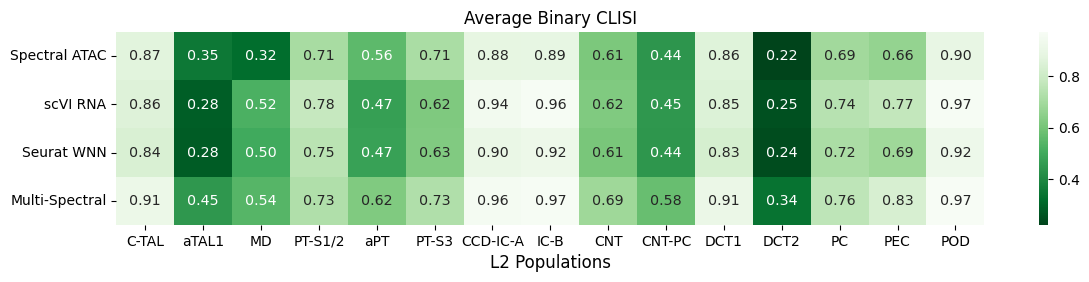

In [28]:
rcParams['figure.figsize'] = (14,2.5)

sns.heatmap(df[pops_l3], annot=True, cmap='Greens_r', fmt = '.2f', annot_kws={'size':10.3})
plt.xlabel('L2 Populations', fontsize=12)
plt.title('Average Binary CLISI')
plt.savefig('figures/CLISI_Heatmap_L2.png', dpi=300, bbox_inches='tight')



In [29]:
df = average_by_hue(mdata.obs, ['S_Deepscore_HCA_l3_Clean_Spectral_Atac_mnn','S_Deepscore_HCA_l3_Clean_scVI_snRNA','S_Deepscore_HCA_l3_Clean_Seurat_WNN','S_Deepscore_HCA_l3_Clean_Spectral_Multi_mnn'],'Deepscore_HCA_l3_Clean')

/tmp/ipykernel_41600/1299353804.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataframe.groupby(hue_key)[columns].mean()


In [30]:
df.index = ['Spectral ATAC','scVI RNA','Seurat WNN', 'Multi-Spectral']

In [31]:
pops = mdata[mdata.obs['Deepscore_HCA_l1_Clean'].isin(['IMM'])].obs['Deepscore_HCA_l1_Clean'].unique()
pops_l3 = []
for i in ['TAL','PT','IC','CNT','DCT','PC','PEC','POD']:
    pops_l3 = pops_l3 + list(mdata[mdata.obs['Deepscore_HCA_l1_Clean'].isin([i])].obs['Deepscore_HCA_l3_Clean'].unique())

In [ ]:
# REMOVING LOWLY DETECTED POPs
pops_l3.remove('aTAL2')
pops_l3.remove('CNT-IC-A')

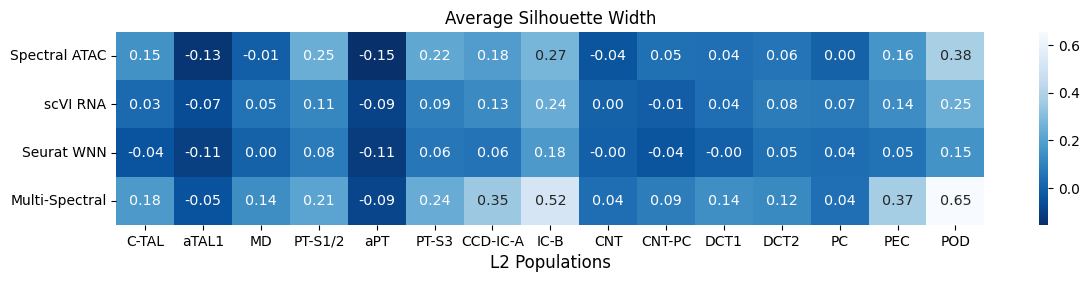

In [34]:
rcParams['figure.figsize'] = (14,2.5)

sns.heatmap(df[pops_l3], annot=True, cmap='Blues_r', fmt = '.2f', annot_kws={'size':10.3})
plt.xlabel('L2 Populations', fontsize=12)
plt.title('Average Silhouette Width')
plt.savefig('figures/AWS_Heatmap_L2.png', dpi=300, bbox_inches='tight')


# MANUAL ANNOTATION COMPARISON HEATMAP

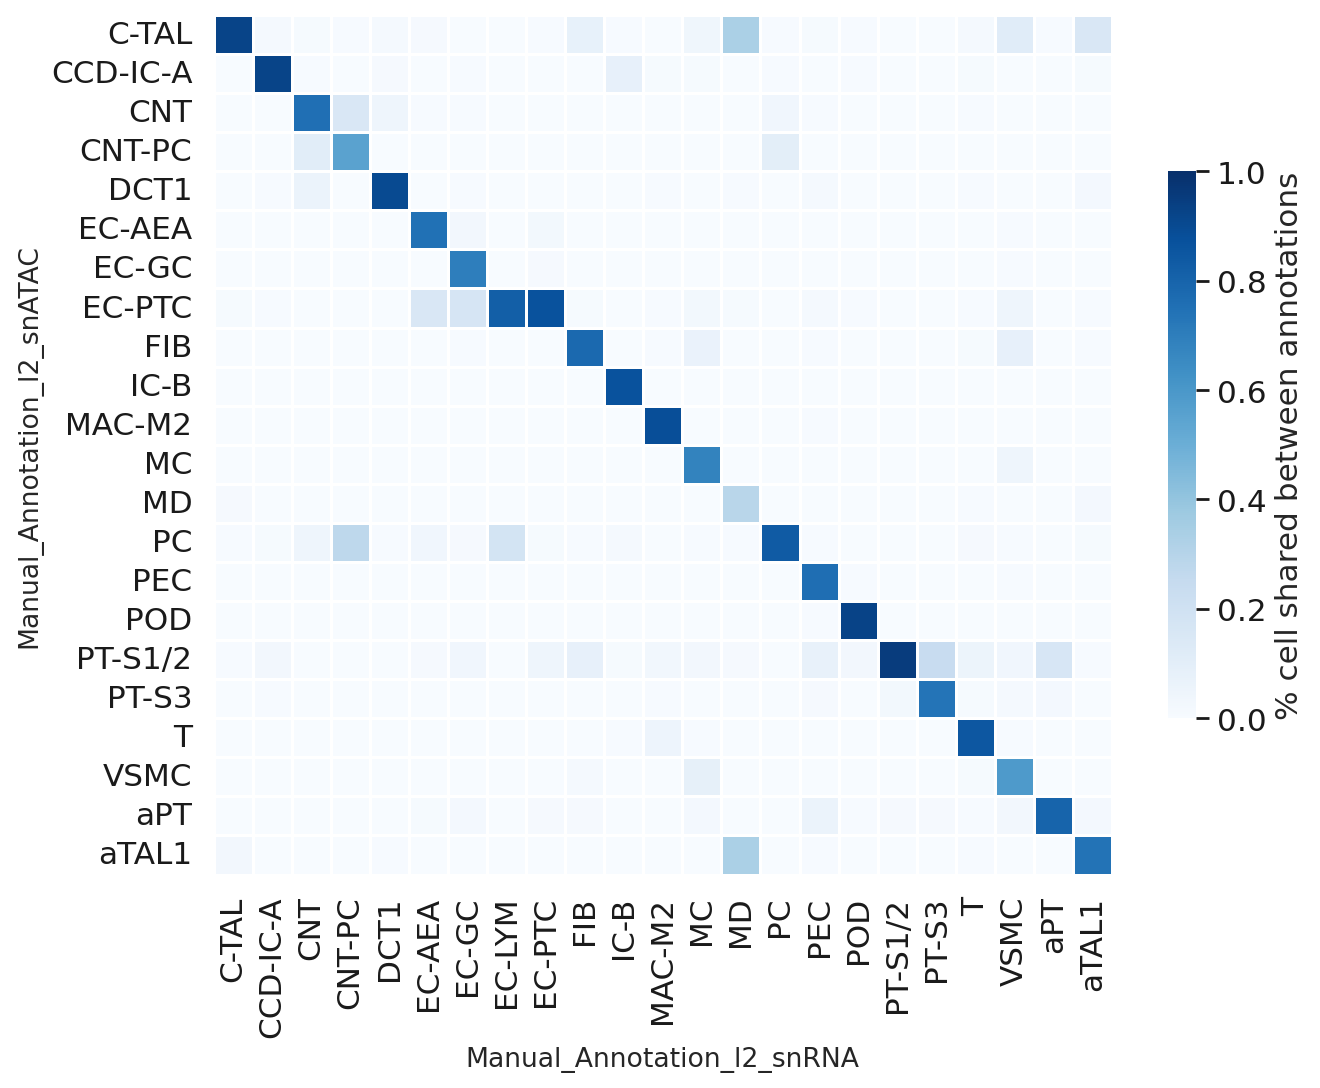

In [ ]:
df = comparison_heatmap(atac, key1 = 'Manual_Annotation_l2_snRNA', key2='Manual_Annotation_l2_snATAC', cmap = 'Blues', figsize=('9', '9'), annot=False)
plt.savefig('figures/Clustering_based_Ann_snRNA_snATAC_L2.png')